## 3. Recognizing CIFAR-10 Images

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import tensorflow.keras.backend as K

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

K.clear_session()

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS, IMG_COLS = 32, 32
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, IMG_CHANNELS)

# Parameters
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIMIZER = optimizers.RMSprop()

In [3]:
# get the data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

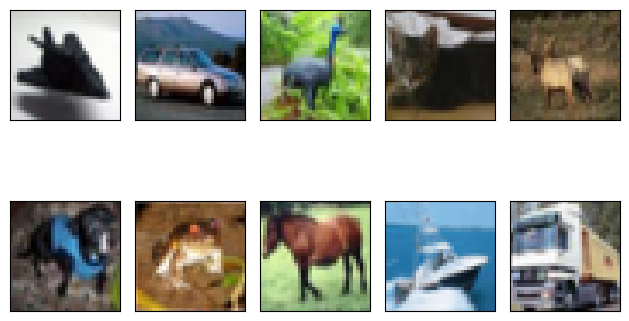

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[np.where(y_train==i)[0][0]]/255.
    ax[i].imshow(img, interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show();

In [5]:
X_train, X_test = X_train/255., X_test/255.

# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [6]:
# define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(32, (3,3), activation='relu', 
                                   input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(rate=0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))

    return model


model = build(input_shape=INPUT_SHAPE, classes=CLASSES)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense (Dense)               (None, 512)               3686912   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [7]:
# Use TensorBoard
callbacks = [tf.keras.callbacks.TensorBoard(log_dir='./logs')]

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_split=VALIDATION_SPLIT,
                    verbose=VERBOSE, callbacks=callbacks, 
                    workers=8, use_multiprocessing=True)

Epoch 1/20
313/313 [==============================] - 14s 7ms/step - loss: 1.6997 - accuracy: 0.3961 - val_loss: 1.4200 - val_accuracy: 0.4869
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3642 - accuracy: 0.5190 - val_loss: 1.2815 - val_accuracy: 0.5440
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2404 - accuracy: 0.5641 - val_loss: 1.1939 - val_accuracy: 0.5920
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1459 - accuracy: 0.5985 - val_loss: 1.1935 - val_accuracy: 0.5933
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0694 - accuracy: 0.6294 - val_loss: 1.1843 - val_accuracy: 0.5958
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0098 - accuracy: 0.6465 - val_loss: 1.1253 - val_accuracy: 0.6066
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9532 - accuracy: 0.6708 - val_loss: 1.2154 - val_accuracy: 0.5889
Epoch

In [8]:
train_score = model.evaluate(X_train, y_train, verbose=VERBOSE)
print(f"\nTrain score: {train_score[0]}")
print(f'Train accuracy: {train_score[1]}\n')

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

1563/1563 [==============================] - 6s 4ms/step - loss: 0.4435 - accuracy: 0.8769

Train score: 0.4434516429901123
Train accuracy: 0.8769400119781494

313/313 [==============================] - 1s 3ms/step - loss: 1.1027 - accuracy: 0.6674

Test score: 1.1027315855026245
Test accuracy: 0.6674000024795532


In [9]:
# %load_ext tensorboard

In [10]:
# %tensorboard --logdir={"./logs"}

In [11]:
# !kill -f

In [12]:
# from tensorboard import notebook

# notebook.list() # View open TensorBoard instances

In [13]:
# notebook.display(port=6006, height=1000)

In [14]:
# !kill -f